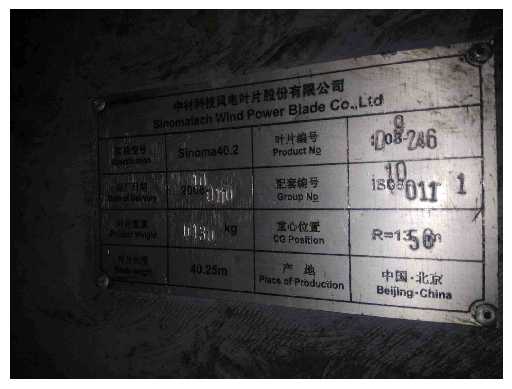

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 加载图像
image_bgr = cv2.imread('mingpai_halfdark.jpeg')


# 将BGR图像转换为RGB图像
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 在Jupyter Notebook中显示图像
plt.imshow(image)
plt.axis('off')  # 不显示坐标轴
plt.show()
# # 显示原始图像
# cv2.imshow('Original Image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



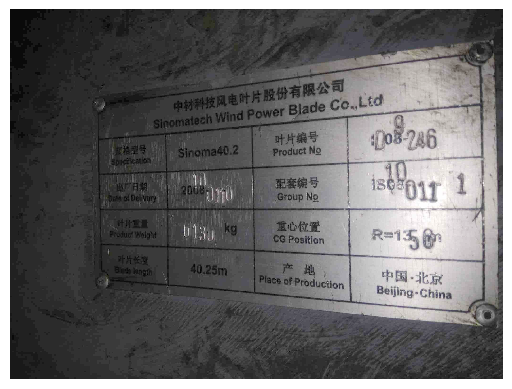

In [3]:
# Gamma 校正函数
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)], dtype=np.uint8)
    return cv2.LUT(image, table)

# 应用 Gamma 校正
gamma_corrected = gamma_correction(image, 1.5)

# 在Jupyter Notebook中显示图像
plt.imshow(gamma_corrected)
plt.axis('off')  # 不显示坐标轴
plt.show()

# cv2.imshow('Gamma Corrected Image', gamma_corrected)
# cv2.waitKey(0)

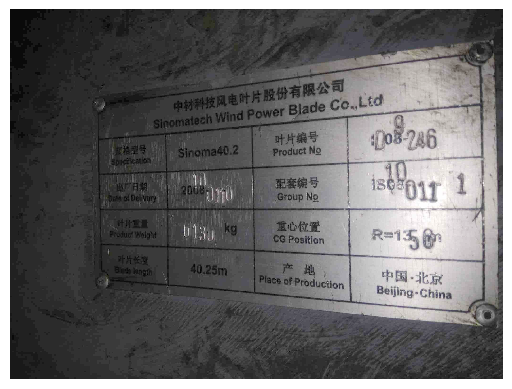

In [4]:
# 对比度拉伸函数
def contrast_stretching(image):
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    stretched = ((image - min_pixel) / (max_pixel - min_pixel)) * 255
    return np.uint8(stretched)

# 应用对比度拉伸
contrast_stretched = contrast_stretching(image)
# 在Jupyter Notebook中显示图像
plt.imshow(gamma_corrected)
plt.axis('off')  # 不显示坐标轴
plt.show()

# cv2.imshow('Contrast Stretched Image', contrast_stretched)
# cv2.waitKey(0)

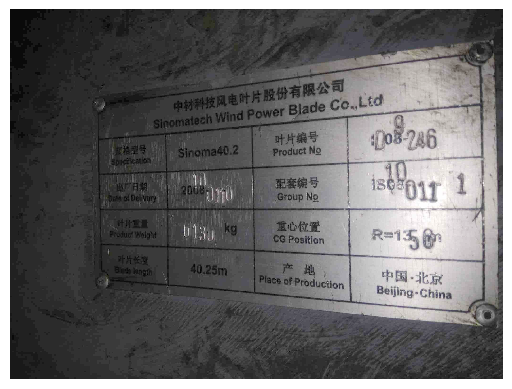

In [5]:
# 直方图均衡化函数
def histogram_equalization(image):
    # 将图像转换为灰度图
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray_image)
    return equalized

# 应用直方图均衡化
equalized = histogram_equalization(image)
# 在Jupyter Notebook中显示图像
plt.imshow(gamma_corrected)
plt.axis('off')  # 不显示坐标轴
plt.show()

# cv2.imshow('Equalized Image', equalized)
# cv2.waitKey(0)

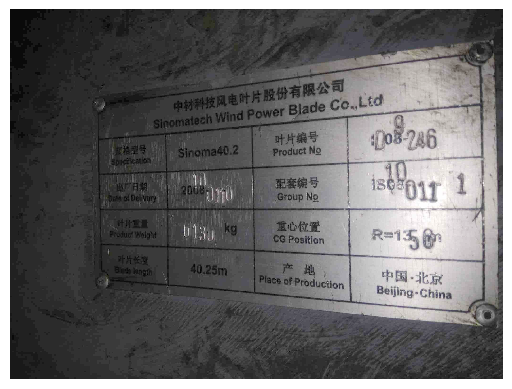

In [6]:
# 自适应直方图均衡化（CLAHE）函数
def clahe_equalization(image):
    # 将图像转换为灰度图
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(gray_image)
    return clahe_image

# 应用 CLAHE
clahe_image = clahe_equalization(image)
# 在Jupyter Notebook中显示图像
plt.imshow(gamma_corrected)
plt.axis('off')  # 不显示坐标轴
plt.show()

# cv2.imshow('CLAHE Image', clahe_image)
# cv2.waitKey(0)


In [7]:
# 保存处理后的图像
cv2.imwrite('gamma_corrected_image.jpg', gamma_corrected)
cv2.imwrite('contrast_stretched_image.jpg', contrast_stretched)
cv2.imwrite('equalized_image.jpg', equalized)
cv2.imwrite('clahe_image.jpg', clahe_image)

True